## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import benchmark as bench
import cpso

## Get Objective Function

In [7]:
objective = bench.Rastrigin(None, dims=1)
llim = objective.llim
rlim = objective.rlim
func = objective.obj
der = objective.objder

## Adaswarm

In [8]:
swarm = cpso.EMPSO.get_chaotic_swarm(
    {
        'init_cmap'    : {
            'name'      : 'logistic',        # Initialisation map --> Logistic map
            'args'      : ()                 # Default logistic parameter --> 4
        },
        
        'dyn_cmap'     : {
            'name'      : 'tent',            # Chaotic map for r1, r2 --> Tent map
            'args'      : ()                 # Default tent paraneter --> 0.49999
        }
    }
)

mizer = swarm(func, llim, rlim, 25)
retpack = mizer.optimize()
opt, approxGrad = retpack['rets']
print ("\rOptimum is at f({}) = {}".format(opt, func(opt.reshape(1,-1))[0]))
print ("Gradient at optimum = {}".format(approxGrad(opt)[0]))

Optimum is at f([3.51522622e-10]) = 0.0
Gradient at optimum = -0.0


## Gradient Approximation

In [9]:
# Perturbing the optimum
dopt = opt + 1e-5*np.random.random_sample (opt.shape)
print ("approxGrad({}) = {}".format(dopt, approxGrad(dopt).flatten()))

approxGrad([7.49262123e-06]) = [-7.83557941e-05]


Objective function info --> 

    Rastrigin -
        An + sum(xi^2 - Acos(2pi*xi))
        f(0, ...) = 0
        xi <- [-5.12, 5.12]
    


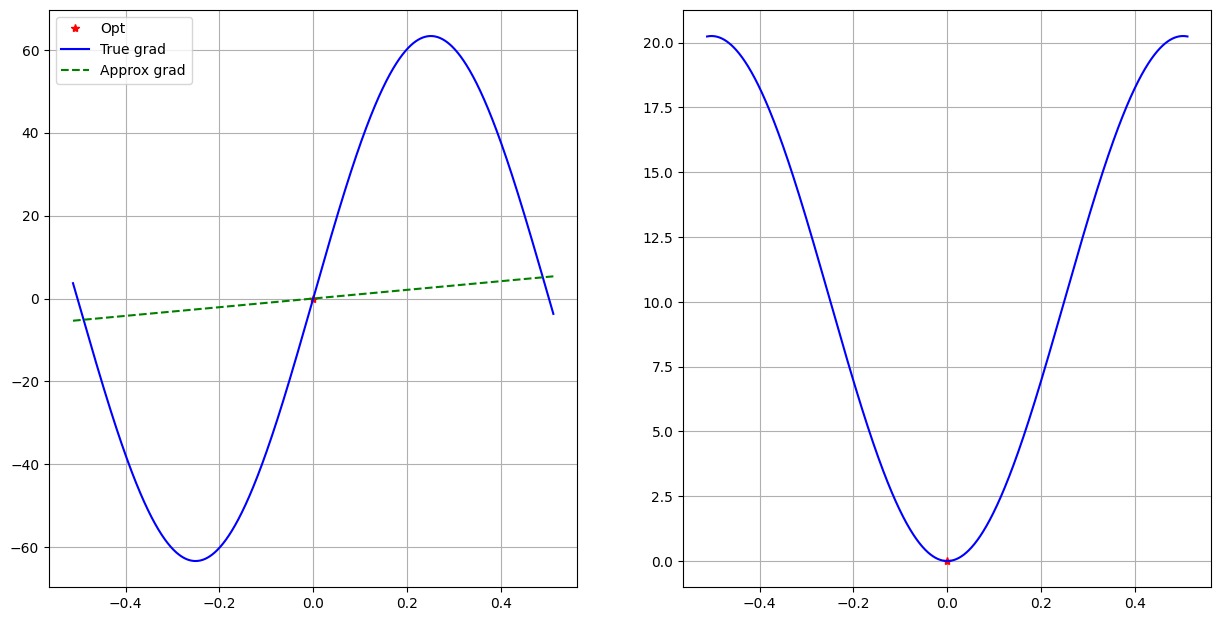

In [10]:
assert llim.shape[0] == 1

truGrad = objective.objder
x = (lambda dx:np.linspace(opt-dx, opt+dx, 1000))(min(opt[0]-llim[0], rlim[0]-opt[0])/10)
print ("Objective function info --> \n{}".format(objective.__doc__))

fig, ax = plt.subplots(1,2, figsize=(15,7.5))
ax[0].plot(opt, truGrad(opt.reshape(1,-1)).flatten(), '*r', label="Opt")
ax[0].plot(x, truGrad(x), '-b', label="True grad")
ax[0].plot(x, -approxGrad(x), '--g', label="Approx grad")
ax[0].grid('on')
ax[1].plot(opt, func(opt.reshape(1,-1)).flatten(), '*r', label="Opt")
ax[1].plot(x, func(x), 'b', label="Objective")
ax[1].grid('on')
leg = ax[0].legend();